In [19]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_46126/3521657220.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


Average: 0.1149327844217944
Mode: 0.0
Median: 0.11051955642264433


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_46126/3521657220.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


Average: 0.26907775052762717
Mode: 0.0
Median: 0.2581566666636684


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_46126/3521657220.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


Average: 0.4870677628346547
Mode: 0.0
Median: 0.48997098113716187


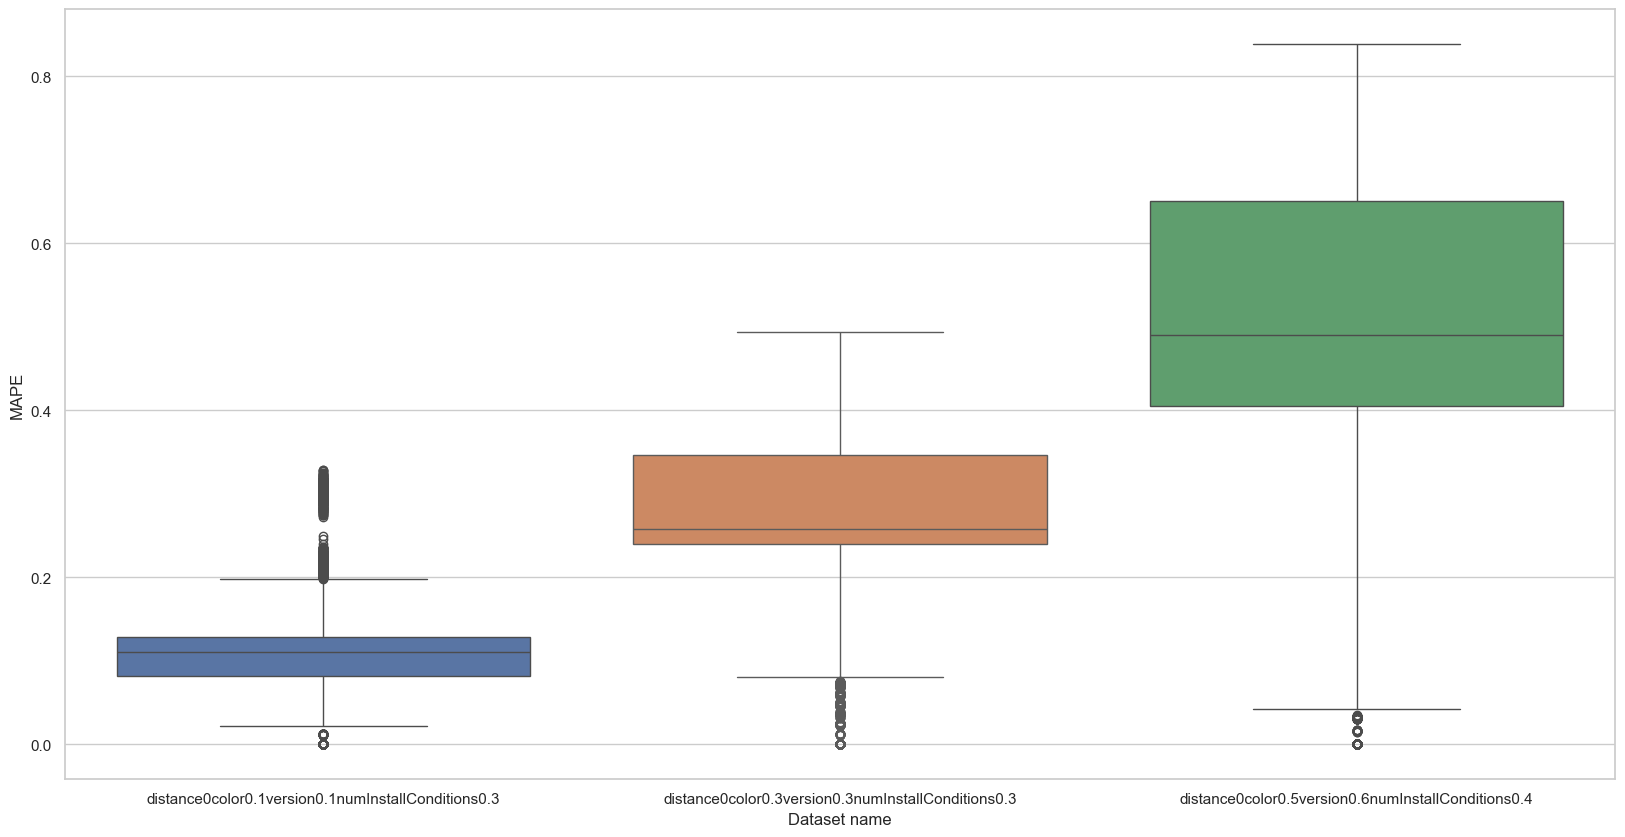

In [21]:
findspark.init()

analysis = [
    "distance0color0.1version0.1numInstallConditions0.3",
    "distance0color0.3version0.3numInstallConditions0.3",
    "distance0color0.5version0.6numInstallConditions0.4",
]

seaborn.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

results = {}

for dataset in analysis:
    df = pd.read_parquet(f'../../generate data/5.2/general/{dataset}/')
    df = df[~df["partCodeId"].str.contains("model")]

    df["formula_result"] = (df["dfQuantity"] - df["actualQuantity"]).abs() / df["actualQuantity"]
    # Group by the correct columns
    df_result = df.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        MAPE=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()
    
    df_result = df_result[df_result["number"] > 0 ]

    # df_result.to_parquet("./blah.parquet", index=False)

    # Remove values that are below 0
    df_result = df_result[df_result["MAPE"] >= 0]

    # Cap the MAPE values at 2
    # df_result["MAPE_capped"] = df_result["MAPE"].clip(upper=2)

    # Calculate statistics
    average = df_result["MAPE"].mean()
    mode = df_result["MAPE"].mode()[0]
    median = df_result["MAPE"].median()

    print(f"Average: {average}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    df_result["Dataset name"] = dataset
    # Plot the data using seaborn
    ax = seaborn.boxplot(x=df_result["Dataset name"], y=df_result["MAPE"] )



plt.show()
